# Import Libraries

In [1509]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error


## Reading files

In [1510]:
cars_train=pd.read_excel('Data_Train (1).xlsx')

In [1511]:
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [1512]:
cars_test = pd.read_excel("Data_Test (1).xlsx")

In [1513]:
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


### Data Exploration

In [1514]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [1515]:
cars_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [1516]:
cars_train.shape


(6019, 12)

In [1517]:
cars_test.shape

(1234, 11)

In [1518]:
cars_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [1519]:
cars_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [1520]:
cars_train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [1521]:
cars_test.nunique()

Name                 768
Location              11
Year                  20
Kilometers_Driven    755
Fuel_Type              4
Transmission           2
Owner_Type             4
Mileage              301
Engine               104
Power                249
Seats                  7
dtype: int64

## Data Cleaning And PreProcessing

### 1)Name

In [1522]:
cars_train["Name"].value_counts()

Mahindra XUV500 W8 2WD                       49
Maruti Swift VDI                             45
Honda City 1.5 S MT                          34
Maruti Swift Dzire VDI                       34
Maruti Swift VDI BSIV                        31
                                             ..
Tata New Safari DICOR 2.2 EX 4x2              1
Volkswagen Ameo 1.5 TDI Comfortline           1
Ford EcoSport 1.5 Ti VCT MT Signature         1
Nissan Sunny 2011-2014 XV Special Edition     1
Volvo XC60 D5 Inscription                     1
Name: Name, Length: 1876, dtype: int64

In [1523]:
cars_test["Name"].value_counts()

Maruti Alto LXi                        9
Volkswagen Polo 1.2 MPI Highline       8
Honda City 1.5 V MT                    8
Maruti Swift Dzire VDI                 8
Hyundai i10 Sportz 1.2                 7
                                      ..
Mahindra Quanto C2                     1
Skoda Laura L and K MT                 1
Tata Tiago 1.05 Revotorq XT Option     1
Toyota Innova 2.5 V Diesel 7-seater    1
Toyota Innova Crysta 2.4 VX MT 8S      1
Name: Name, Length: 768, dtype: int64

**From the above values we can say that the Car Brand is also important here. So I will extract the car brand and model name from the name of the car.**

In [1524]:
make_train = cars_train["Name"].str.split(" ", expand = True)
make_test = cars_test["Name"].str.split(" ", expand = True)

cars_train["Brand"] = make_train[0]
cars_test["Brand"] = make_test[0]

cars_train["Model"] = make_train[1]
cars_test["Model"] = make_test[1]


In [1525]:
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4


**Now I can drop the name column since it is not important now.**

In [1526]:
cars_train.drop(['Name'], axis=1, inplace = True)

cars_test.drop(['Name'], axis=1, inplace = True)

In [1527]:
cars_train.insert(0,'Brand', cars_train.pop("Brand"))

cars_test.insert(0,'Brand', cars_test.pop("Brand"))

In [1528]:
cars_train.insert(1,'Model', cars_train.pop("Model"))

cars_test.insert(1,'Model', cars_test.pop("Model"))

In [1529]:
cars_train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [1530]:
cars_test.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Alto,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti,Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota,Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota,Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai,i20,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


### 2)Year

**Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.**

In [1531]:
cars_train['Car_Age'] = 2020 - cars_train['Year']
cars_test['Car_Age'] = 2020 - cars_test['Year']

In [1532]:
cars_train.drop('Year',axis=1,inplace=True)
cars_test.drop('Year',axis=1,inplace=True)


### 3)Kilometers Driven

**Kilometers_Driven is a numerical column with a certain range of values.**

In [1533]:
cars_train["Kilometers_Driven"]

0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
6014     27365
6015    100000
6016     55000
6017     46000
6018     47000
Name: Kilometers_Driven, Length: 6019, dtype: int64

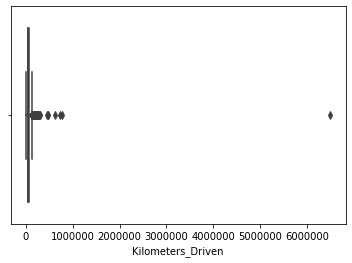

In [1534]:
sns.boxplot('Kilometers_Driven',data=cars_train)

In [1535]:
cars_train[(cars_train.Kilometers_Driven>1000000)&( cars_train.Car_Age<10)] 

,Brand,Model,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
2328,BMW,X5,Chennai,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,3


**Outliers are present so lets just eliminate them. A second hand car with odometer value 6500000 is ridiculous. So lets eliminte it.**

In [1536]:
cars_train.drop(cars_train[cars_train.Kilometers_Driven>100000].index,axis=0,inplace=True)

### 4)Mileage

**This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.**

In [1537]:
cars_train['Mileage'] = cars_train['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype("float64")
cars_test['Mileage'] = cars_test['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype("float64")

cars_train["Mileage"] = pd.to_numeric(cars_train['Mileage'], errors = 'coerce')
cars_test["Mileage"] = pd.to_numeric(cars_test['Mileage'], errors = 'coerce')

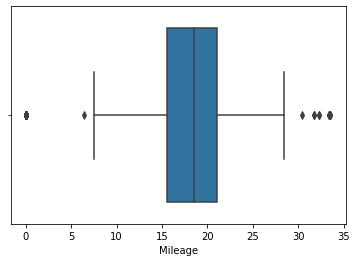

In [1538]:
sns.boxplot('Mileage',data=cars_train)

In [1539]:
cars_train['Mileage'] = cars_train['Mileage'].astype(float)
cars_train.loc[cars_train['Mileage']<=1, 'Mileage'].value_counts()

0.0    56
Name: Mileage, dtype: int64

In [1540]:
cars_train.drop(cars_train[cars_train['Mileage']==0.0].index, axis=0 , inplace=True)

**Let's check for missing values.**

In [1541]:
print(sum(cars_train["Mileage"].isnull()))
print(sum(cars_test["Mileage"].isnull()))

2
0


**There is two missing values. I'll replace the missing value with the median value of the column based on the training data.**


In [1542]:
cars_train["Mileage"].fillna(cars_train["Mileage"].astype("float64").median(), inplace = True)
cars_test["Mileage"].fillna(cars_test["Mileage"].astype("float64").median(), inplace = True)

In [1543]:
print(sum(cars_train["Mileage"].isnull()))
print(sum(cars_test["Mileage"].isnull()))

0
0


### 5)Engine and Power

**The Engine values are defined in CC so I need to remove CC from the data. Similarly, Power has bhp, so I'll remove bhp from it. Also, as there are missing values in Engine, Power, I'll again replace them with the mean value.**

In [1544]:
cars_train['Engine'] =cars_train['Engine'].apply(lambda x : str(x).split(" ")[0]).astype("float64")
cars_test['Engine'] =cars_test['Engine'].apply(lambda x : str(x).split(" ")[0]).astype("float64")

cars_train["Engine"] = pd.to_numeric(cars_train['Engine'], errors = 'coerce')
cars_test["Engine"] = pd.to_numeric(cars_test['Engine'], errors = 'coerce')

cars_train["Engine"].fillna(cars_train["Engine"].astype("float64").mean(), inplace = True)
cars_test["Engine"].fillna(cars_test["Engine"].astype("float64").mean(), inplace = True)


In [1545]:
print(sum(cars_train["Engine"].isnull()))
print(sum(cars_test["Engine"].isnull()))

0
0


In [1546]:
cars_train['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '98.6 bhp', '83.8 bhp',
       '167.62 bhp', '190 bhp', '88.5 bhp', '177.01 bhp', '80 bhp',
       '67.1 bhp', '108.45 bhp', '138.1 bhp', '184 bhp', '179.5 bhp',
       '103.5 bhp', '64 bhp', '82 bhp', '254.8 bhp', '73.9 bhp',
       '46.3 bhp', '37.5 bhp', '77 bhp', '82.9 bhp', '149.92 bhp',
       '138.03 bhp', '112.2 bhp', '163.7 bhp', '71 bhp', '105 bhp',
       '174.33 bhp', '75 bhp', '103.2 bhp', '53.3 bhp', '78.9 bhp',
       '147.8 bhp', '68 bhp', '186 bhp', '170 bhp', '140 bhp', '78 bhp',
       '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp', '86.7 bhp',
       '73.94 bhp', '117.3 bhp', '218 bhp', 'null bhp', '89.84 bhp',
       '110 bhp', '90 bhp', '82.85 bhp', '67 bhp', '241.4 bhp', '35 bhp',
       '270.9 bhp', '126.32 bhp', '73 bhp', '130 bhp', '100.6 bhp',
       '150 bhp', '75.94 bhp', '

In [1547]:
cars_train['Power'] = cars_train['Power'].replace('null bhp','0 bhp')
cars_test['Power'] = cars_test['Power'].replace('null bhp','0 bhp')

In [1548]:
cars_train['Power'] =cars_train['Power'].apply(lambda x : str(x).split(" ")[0]).astype("float64")
cars_test['Power'] =cars_test['Power'].apply(lambda x : str(x).split(" ")[0]).astype("float64")

cars_train["Power"] = pd.to_numeric(cars_train['Power'], errors = 'coerce')
cars_test["Power"] = pd.to_numeric(cars_test['Power'], errors = 'coerce')

cars_train["Power"].fillna(cars_train["Power"].astype("float64").mean(), inplace = True)
cars_test["Power"].fillna(cars_test["Power"].astype("float64").mean(), inplace = True)

cars_train["Power"].replace(0,cars_train["Power"].mean(),inplace=True)
cars_test["Power"].replace(0,cars_test["Power"].mean(),inplace=True)

In [1549]:
print(sum(cars_train["Power"].isnull()))
print(sum(cars_test["Power"].isnull()))

0
0


### 6)Seats

**The null values in the seats column is filled with the value 5 seats**

**Also converting its type from Float to Integer .**

In [1550]:
cars_train["Seats"].fillna(5, inplace = True)
cars_test["Seats"].fillna(5, inplace = True)

In [1551]:
cars_train.Seats=cars_train.Seats.astype('int64')
cars_test.Seats=cars_test.Seats.astype('int64')

In [1552]:
print(sum(cars_train["Seats"].isnull()))
print(sum(cars_test["Seats"].isnull()))

0
0


### 7)Price

In [1553]:
cars_train.Price.sort_values(ascending=False)

4079    160.00
5781    120.00
5919    100.00
1505     97.07
1974     93.67
         ...  
2605      0.50
1628      0.45
2847      0.45
3138      0.45
1713      0.44
Name: Price, Length: 5456, dtype: float64

In [1554]:
cars_train[(cars_train.Price==160.00)|(cars_train.Price==0.44)]

,Brand,Model,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
1713,Tata,Nano,Pune,65000,Petrol,Manual,Second,26.00,624.0,35.0,4,0.44,9
4079,Land,Rover,Hyderabad,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5,160.00,3


**Price of the costliest car is Land Rover(160 lakhs)**

**Price of the cheapest car is Tata Nano(0.44 lakhs)**

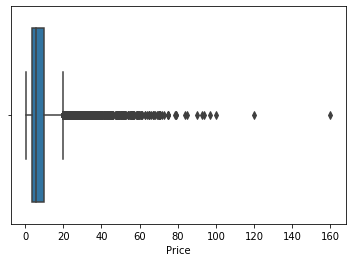

In [1555]:
sns.boxplot('Price',data=cars_train)

**We can see some Outliers so lets eliminate them.**

In [1556]:
cars_train.drop(cars_train[cars_train['Price']>100].index, axis=0 , inplace=True)

## Data Visualization

Text(0, 0.5, 'Count of cars')

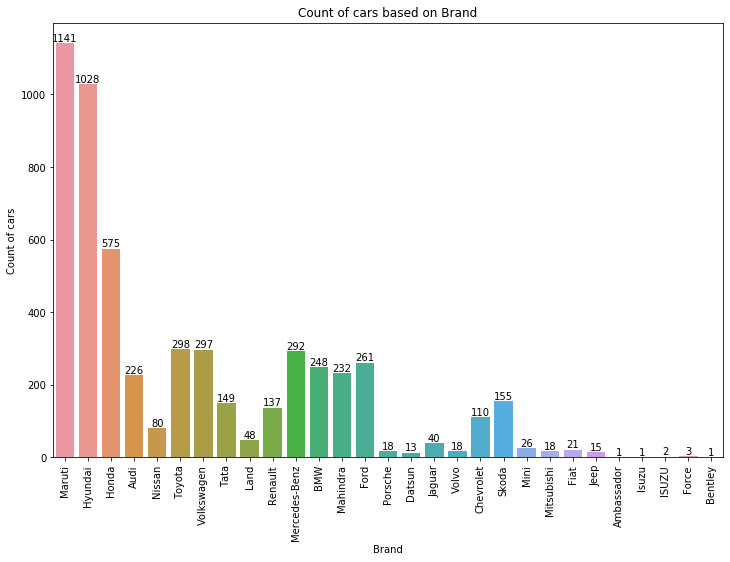

In [1557]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Brand', data = cars_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Brand")
plt.xlabel("Brand")
plt.ylabel("Count of cars")

**Maximum cars in the dataset are by the manufacturer Maruti.**

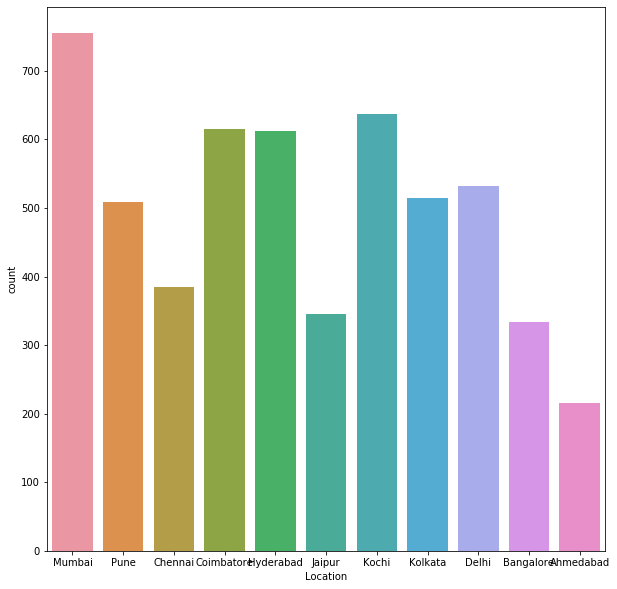

In [1558]:
plt.figure(figsize = (10,10))
sns.countplot('Location',data=cars_train)
plt.show()

**Number of cars based on the location**

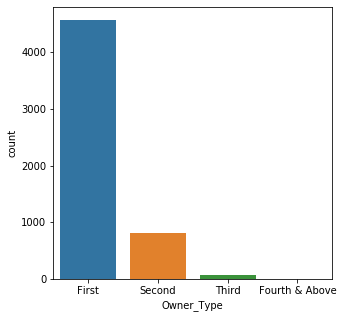

In [1559]:
plt.figure(figsize = (5,5))
sns.countplot('Owner_Type',data=cars_train)
plt.show()

**First Owner type Vehicles are more in number.**

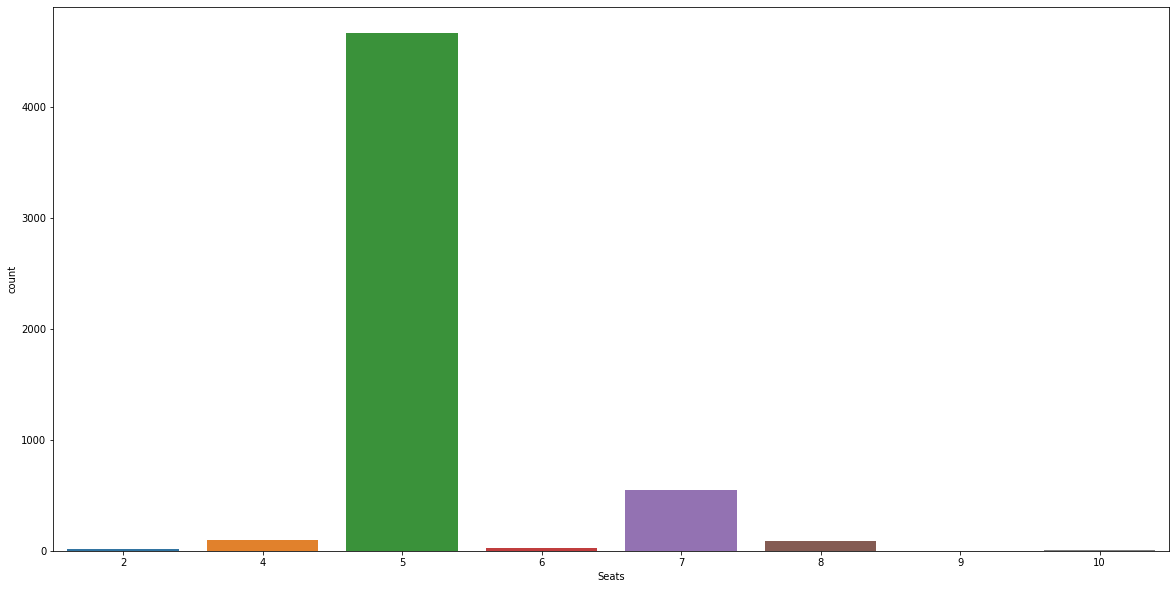

In [1560]:
plt.figure(figsize = (20,10))
sns.countplot('Seats',data=cars_train)
plt.show()

**Number of cars based o the number of seats.**

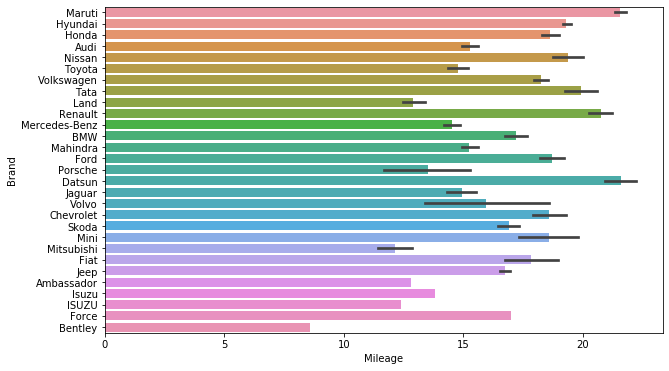

In [1561]:
plt.figure(figsize = (10,6))
sns.barplot(data = cars_train, x = 'Mileage', y = 'Brand')

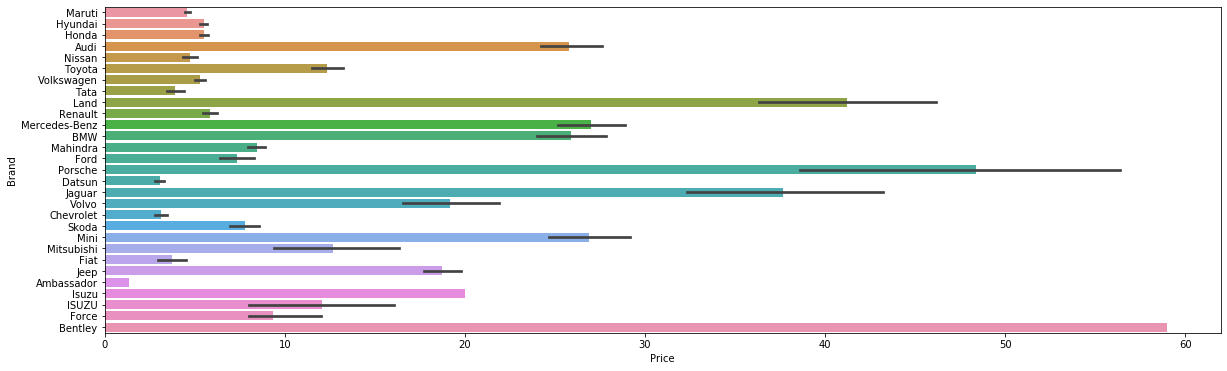

In [1562]:
plt.figure(figsize = (20,6))
sns.barplot(data = cars_train, x = 'Price', y = 'Brand')

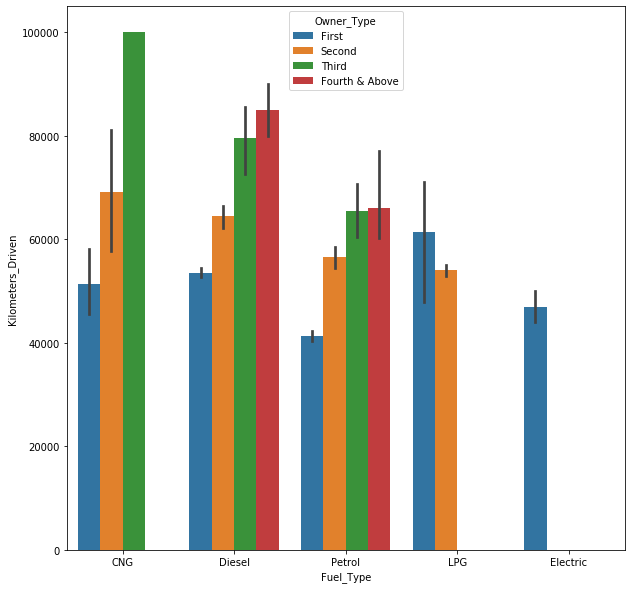

In [1563]:
plt.figure(figsize = (10,10))
sns.barplot(data = cars_train , x = 'Fuel_Type', y = 'Kilometers_Driven', hue = 'Owner_Type')

# ML Model

In [1564]:
cars_train.isnull().sum()

Brand                0
Model                0
Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
dtype: int64

**Converting the following variables into categorical variables so that the can be converted into Dummy variables later.**

In [1565]:
cars_train['Brand'] = cars_train['Brand'].astype('category')
cars_train['Fuel_Type'] = cars_train['Fuel_Type'].astype('category')
cars_train['Transmission'] = cars_train['Transmission'].astype('category')
cars_train['Owner_Type'] = cars_train['Owner_Type'].astype('category')
cars_train['Model'] = cars_train['Model'].astype('category')
cars_train['Location'] = cars_train['Location'].astype('category')

cars_test['Brand'] = cars_test['Brand'].astype('category')
cars_test['Fuel_Type'] = cars_test['Fuel_Type'].astype('category')
cars_test['Transmission'] = cars_test['Transmission'].astype('category')
cars_test['Owner_Type'] = cars_test['Owner_Type'].astype('category')
cars_test['Model'] = cars_test['Model'].astype('category')
cars_test['Location'] = cars_test['Location'].astype('category')





In [1566]:
# spliting the train dataset into features X and target Y variables
X = cars_train.drop(['Price'], axis = 1)
Y = cars_train.Price

## Data Processing

**Now that we have worked with the training data, let's create dummy columns using label encoding for categorical columns before we begin training.**

In [1567]:

label_encoder = LabelEncoder()
X['Brand'] = label_encoder.fit_transform(X['Brand'])
X['Fuel_Type'] = label_encoder.fit_transform(X['Fuel_Type'])
X['Transmission'] = label_encoder.fit_transform(X['Transmission'])
X['Mileage'] = label_encoder.fit_transform(X['Mileage'])
X['Owner_Type'] = label_encoder.fit_transform(X['Owner_Type'])
X['Model'] = label_encoder.fit_transform(X['Model'])
X['Location'] = label_encoder.fit_transform(X['Location'])


## Train Test Split on the Training data

In [1568]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3817, 12), (3817,), (1637, 12), (1637,))

## Using the Random Forest Regressor Algorithithm

In [1569]:

rf = RandomForestRegressor(n_estimators = 200,random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

## R-square error metric value

In [1570]:
r2_score(y_test, y_pred)

0.890443444855228

## Mean Absolute Error

In [1571]:
mean_absolute_error(y_test, y_pred)

1.5519973713529398

## Root Mean Square Error

In [1572]:
import math
rms = math.sqrt(mean_squared_error(y_test, y_pred))
rms

3.739279383512505

In [1573]:
for x in zip(y_test, y_pred, (y_pred - y_test)/y_test*100):
    print(x)

(16.0, 19.85606666666666, 24.100416666666625)
(2.5, 2.8722500000000006, 14.890000000000025)
(13.23, 11.854349999999995, -10.39795918367351)
(31.0, 33.7708, 8.938064516129037)
(5.42, 5.404499999999997, -0.2859778597786523)
(5.4, 4.7931250000000025, -11.238425925925885)
(24.5, 25.532900000000005, 4.215918367346959)
(3.95, 3.9216499999999983, -0.7177215189873891)
(2.55, 2.3801999999999963, -6.658823529411903)
(2.0, 2.453050000000002, 22.652500000000096)
(54.45, 57.360599999999934, 5.345454545454419)
(39.41, 38.59105000000007, -2.078025881755722)
(11.25, 10.995400000000007, -2.2631111111110473)
(6.15, 6.927000000000003, 12.63414634146346)
(7.0, 6.209800000000002, -11.288571428571396)
(1.3, 3.2444500000000023, 149.57307692307708)
(11.88, 10.867999999999997, -8.518518518518551)
(11.57, 11.606599999999993, 0.3163353500431535)
(3.2, 3.0375999999999994, -5.075000000000024)
(4.25, 3.3839500000000013, -20.3776470588235)
(35.0, 27.97886249999999, -20.060392857142883)
(30.54, 35.19100000000006, 15.

(9.32, 8.010600000000002, -14.049356223175947)
(4.69, 5.1541999999999994, 9.897654584221728)
(8.95, 8.448300000000012, -5.605586592178628)
(16.25, 18.062233333333335, 11.15220512820514)
(4.0, 4.206549999999999, 5.163749999999978)
(4.15, 4.080500000000006, -1.6746987951805865)
(24.77, 20.88625000000003, -15.679249091643)
(7.0, 6.633200000000003, -5.239999999999956)
(6.45, 6.348900000000003, -1.567441860465071)
(26.0, 28.339849999999984, 8.999423076923016)
(4.16, 3.977250000000004, -4.393028846153749)
(8.2, 6.962500000000001, -15.091463414634124)
(5.45, 6.286799999999997, 15.35412844036691)
(1.3, 1.1982000000000013, -7.830769230769137)
(27.75, 29.71354999999999, 7.075855855855822)
(2.45, 2.2907000000000024, -6.502040816326439)
(5.8, 6.046099999999995, 4.2431034482757735)
(4.65, 5.280400000000004, 13.5569892473119)
(2.1, 2.9294500000000006, 39.49761904761907)
(9.75, 9.439699999999993, -3.1825641025641733)
(1.6, 1.7315000000000007, 8.218750000000039)
(5.63, 4.845599999999996, -13.932504440

(25.99, 26.9589, 3.7279722970373275)
(14.14, 12.879049999999989, -8.91760961810475)
(5.85, 6.417400000000012, 9.699145299145515)
(1.8, 2.4239499999999996, 34.66388888888886)
(5.75, 5.910650000000005, 2.7939130434783452)
(4.9, 4.396674999999985, -10.271938775510517)
(8.32, 7.855450000000003, -5.583533653846122)
(5.3, 4.5619999999999985, -13.924528301886818)
(0.8, 1.34235, 67.79374999999999)
(12.49, 12.951749999999993, 3.696957566052788)
(10.5, 2.7380500000000008, -73.92333333333332)
(2.9, 3.2643, 12.562068965517245)
(7.5, 8.141400000000003, 8.552000000000035)
(10.15, 9.343216666666654, -7.948604269294049)
(2.6, 3.1421500000000004, 20.85192307692309)
(5.81, 5.570399999999994, -4.1239242685026785)
(28.85, 25.80334999999999, -10.560311958405581)
(13.05, 10.967100000000007, -15.960919540229835)
(7.6, 6.67615, -12.155921052631577)
(5.99, 5.540849999999997, -7.498330550918247)
(1.59, 1.857500000000001, 16.823899371069242)
(3.5, 3.307399999999997, -5.502857142857235)
(7.25, 8.119100000000005, 

## Prediction

In [1574]:
testX = cars_test.copy(deep=True)
#label_encoder = LabelEncoder()
testX['Brand'] = label_encoder.fit_transform(testX['Brand'])
testX['Model'] = label_encoder.fit_transform(testX['Model'])
testX['Location'] = label_encoder.fit_transform(testX['Location'])
testX['Fuel_Type'] = label_encoder.fit_transform(testX['Fuel_Type'])
testX['Transmission'] = label_encoder.fit_transform(testX['Transmission'])
testX['Mileage'] = label_encoder.fit_transform(testX['Mileage'])
testX['Owner_Type'] = label_encoder.fit_transform(testX['Owner_Type'])

In [1575]:
testX

,Brand,Model,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age
0,16,16,4,40929,0,1,0,297,998.0,58.200000,4,6
1,16,16,3,54493,3,1,2,276,796.0,47.300000,5,7
2,26,78,9,34000,1,1,0,58,2393.0,147.800000,7,3
3,26,60,5,139000,1,1,0,264,1364.0,108.396458,5,8
4,9,159,9,29000,3,1,0,170,1197.0,82.850000,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,27,137,5,89411,1,1,0,214,1598.0,103.600000,5,9
1230,27,101,9,59000,3,0,0,140,1197.0,103.600000,5,5
1231,20,91,8,28000,1,1,0,258,1461.0,63.100000,5,8
1232,27,101,10,52262,3,0,3,139,1197.0,103.600000,5,7


In [1576]:
testY = rf.predict(testX)

In [1577]:
testY

array([ 3.1864    ,  2.6137    , 17.63765   , ...,  2.6849    ,
        3.98755   , 16.84009048])

In [1578]:
cars_test['Predicted Price'] = testY
cars_test.head(25)

,Brand,Model,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Predicted Price
0,Maruti,Alto,Delhi,40929,CNG,Manual,First,32.26,998.000000,58.200000,4,6,3.186400
1,Maruti,Alto,Coimbatore,54493,Petrol,Manual,Second,24.70,796.000000,47.300000,5,7,2.613700
2,Toyota,Innova,Mumbai,34000,Diesel,Manual,First,13.68,2393.000000,147.800000,7,3,17.637650
3,Toyota,Etios,Hyderabad,139000,Diesel,Manual,First,23.59,1364.000000,108.396458,5,8,6.177550
4,Hyundai,i20,Mumbai,29000,Petrol,Manual,First,18.50,1197.000000,82.850000,5,6,4.344713
5,Mahindra,XUV500,Coimbatore,85609,Diesel,Manual,Second,16.00,2179.000000,140.000000,7,4,11.484450
6,Toyota,Fortuner,Pune,59000,Diesel,Automatic,First,12.55,2982.000000,168.700000,7,5,19.293575
7,Hyundai,EON,Jaipur,65000,Petrol,Manual,First,21.10,814.000000,55.200000,5,7,2.526900
8,Honda,City,Mumbai,66000,Petrol,Manual,Second,17.00,1497.000000,118.000000,5,9,6.552950
9,Mahindra,XUV500,Coimbatore,54684,Diesel,Manual,First,15.10,2179.000000,140.000000,7,5,10.608300


In [1579]:
cars_test.shape

(1234, 13)

### Writing the Predicted values into an excel file

In [1583]:
cars_test2=pd.read_excel('Test_dataset_predictionn.xlsx')

In [1584]:
cars_test2['Predicted Price'] = testY

In [1585]:
cars_test2.to_excel('Test_dataset_predictionn.xlsx')